1.  	Dataset yang digunakan untuk mengklasifikasi gambar apa ?
Jawab : Klasifikasi gambar botol, gelas, toples
2.  	Sebutkan jumlah image pada masing – masing kelas ?
Jawab : 240 Image
3.  	Dataset dibagi menjadi berapa Folder dan berapa jumlah masing -  masing ?
Jawab : 80 Image per Folder
4.  	Berapa Batch size yang digunakan ?
Jawab : 62
5.  	Image dataset diubah menjadi ukuran berapa sebelum dilakukan convolution ?
Jawab : 256
6.  	Berapa jumlah iterasi yang digunakan ?
Jawab : 62
7.  	sebutkan augmentasi apa saja yang dilakukan dalam pipeline source code yang anda kerjakan ?
Jawab : tidak ada
8.  	sebutkam model layer yang digunakan pada tugas anda ?
Jawab : Conv2D,DropOut dan MaxPooling2D
9.  	optimizer yang digunakan pada tugas anda ?
Jawab : Adam
10.   Berapa total parameter yang digunakan dan parameter yang ditrain ?
Jawab : 5 Parameter
11.   Sebutkan accuracy dan loss pada epoch terakhir ?
Jawab : 0.6667
12.   Sebutkan accuracy yang tertinggi dan epoch ke berapa ?
Jawab : 0.6667 ke 62
13.   Apakah prediksi gambar yang dilakukan sudah benar ?
Jawab : Benar

**Eksperimen**
-        No 1
-        80% train : 10% val : 10% test,  => 1.0000
-        70% train : 15% val : 15% test, => 1.0000
-        80% train : 20% val, => 0.6667
-        70% train : 30% => 0

-        No 2 Augmentasi Data => Flip dan rotasi(0.0000e+00)

-        No 3 Batch Size
-           - Batch Size = 30(0.4000)
-           - Batch Size = 70(0.6000)

In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.math import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

import warnings

warnings.filterwarnings('ignore')

In [342]:
import os
import matplotlib.pyplot as plt
import seaborn as sn

import cv2
from random import randint

import numpy as np

In [343]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [344]:
CLASSES, gems = [], [] # names of classes, count of images for each class

for root, dirs, files in os.walk('../input/image-classification-botolgelastoples/IMAGE CLASSIFICATION BOTOL-GELAS-TOPLES/TEST'):
    f = os.path.basename(root)    # get class name - Amethyst, Onyx, etc    
        
    if len(files) > 0:
        gems.append(len(files))
        if f not in CLASSES:
            CLASSES.append(f) # add folder name
    
    # uncomment this block if you want a text output about each subfolder
    #count_dirs = 0
    #for f in dirs:           # count subfolders
        #count_dirs += 1
    #depth = root.split(os.sep)
    #print((len(depth) - 2) * '--'+'>', '{}:\t {} folders, {} imgs'.format(os.path.basename(root), count_dirs, gems[-1] if gems!=[] else 0)) 
    
gems_count = len(CLASSES) # 87 = number of classes
print('{} classes with {} images in total'.format(len(CLASSES), sum(gems)))

3 classes with 30 images in total


In [345]:
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS=62
CHANNELS=3

In [346]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/image-classification-botolgelastoples/IMAGE CLASSIFICATION BOTOL-GELAS-TOPLES/TEST",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 30 files belonging to 3 classes.


In [347]:
label = dataset.class_names
label

['BOTOL', 'GELAS', 'TOPLES']

In [348]:
def read_imgs_lbls(_dir):
    Images, Labels = [], []
    for root, dirs, files in os.walk(_dir):
        f = os.path.basename(root)  # get class name - Amethyst, Onyx, etc       
        for file in files:
            Labels.append(f)
            try:
                image = cv2.imread(root+'/'+file)              # read the image (OpenCV)
                image = cv2.resize(image,(int(img_w*1.5), int(img_h*1.5)))       # resize the image (images are different sizes)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # converts an image from BGR color space to RGB
                Images.append(image)
            except Exception as e:
                print(e)
    Images = np.array(Images)
    return (Images, Labels)

In [349]:
def get_class_index(Labels):
    for i, n in enumerate(Labels):
        for j, k in enumerate(CLASSES):    # foreach CLASSES
            if n == k:
                Labels[i] = j
    Labels = np.array(Labels)
    return Labels

In [350]:
img_w, img_h = 220, 220

In [351]:
train_dir = "../input/image-classification-botolgelastoples/IMAGE CLASSIFICATION BOTOL-GELAS-TOPLES/TEST"
train_image,train_label = read_imgs_lbls(train_dir)
train_label = get_class_index(train_label)

In [352]:
test_dir = "../input/image-classification-botolgelastoples/IMAGE CLASSIFICATION BOTOL-GELAS-TOPLES/TEST"
test_image,testLbl = read_imgs_lbls(test_dir)
test_label = get_class_index(testLbl)

In [353]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

(30, 256, 256, 3)
tf.Tensor(
[[[ 80.40625   90.40625   82.40625 ]
  [ 82.        92.        84.      ]
  [ 81.50781   93.50781   83.50781 ]
  ...
  [ 70.69531   78.69531   63.695312]
  [ 69.42578   77.42578   62.42578 ]
  [ 63.902344  73.77734   58.152344]]

 [[ 86.36719   98.11719   88.36719 ]
  [ 85.51172   97.26172   87.51172 ]
  [ 83.28125   95.28125   85.28125 ]
  ...
  [ 66.73047   74.73047   59.73047 ]
  [ 69.19531   77.19531   62.195312]
  [ 67.51172   75.51172   60.51172 ]]

 [[ 87.29297   97.29297   89.29297 ]
  [ 83.34375   94.90625   85.34375 ]
  [ 86.91406   96.97656   88.91406 ]
  ...
  [ 67.421875  78.421875  62.421875]
  [ 64.53516   75.53516   59.535156]
  [ 66.57031   77.57031   61.570312]]

 ...

 [[150.       158.       147.      ]
  [150.4414   155.4414   148.4414  ]
  [152.78906  158.78906  148.78906 ]
  ...
  [148.30469  154.30469  144.30469 ]
  [149.27344  155.27344  145.27344 ]
  [147.24219  153.24219  143.24219 ]]

 [[152.13672  160.13672  149.13672 ]
  [151.9

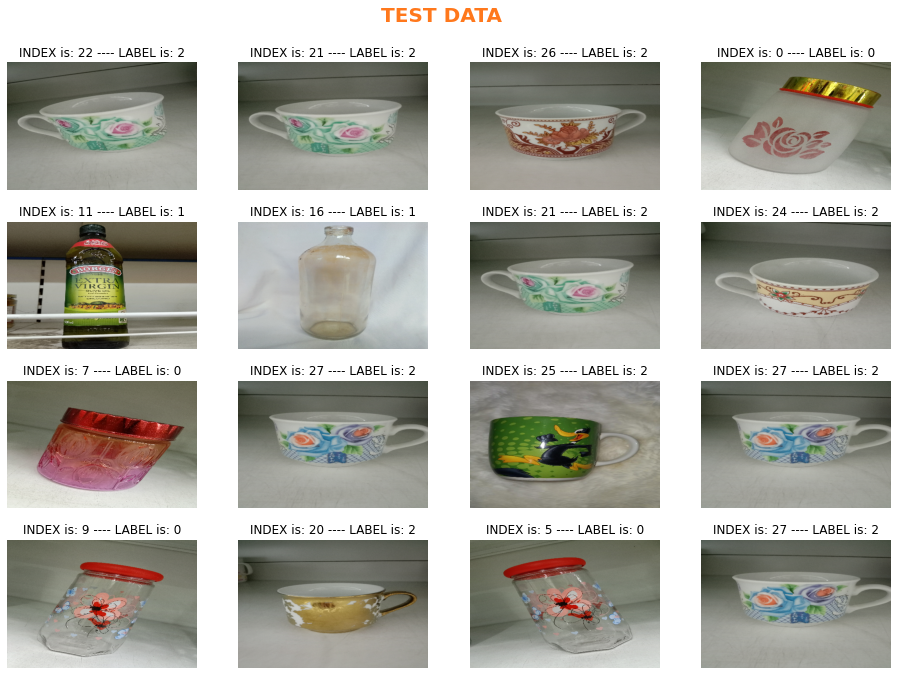

In [354]:
fig, axes = plt.subplots(4,4, figsize=(13,9))
fig.tight_layout()
plt.suptitle("TEST DATA\n\n\n\n", size = 20, va = 'center', color = '#ff781c', fontweight='bold')

for i in range(4):
    for j in range(4):
        
        # Select random number b/w 0 and length of test_image
        rand_num = np.random.randint(0, len(test_image) + 1)
        img = test_image[rand_num]      # image at specific index
        label = test_label[rand_num]    # label number of image

        axes[i][j].imshow(img, aspect='auto')
        axes[i][j].set_title(f"INDEX is: {rand_num} ---- LABEL is: {label}")
        axes[i][j].axis('off')

In [355]:
train_label = train_label.reshape(train_label.shape[0])
test_label = test_label.reshape(test_label.shape[0])

In [356]:
classes = ["Botol","Gelas","Toples"]

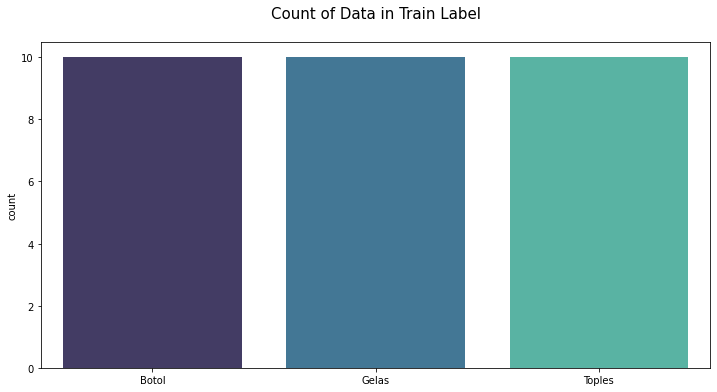

In [357]:
plt.figure(figsize = (12,6))
plt.title("Count of Data in Train Label\n", size = 15)

sns.countplot(x = train_label, palette='mako').set(xticklabels = classes);

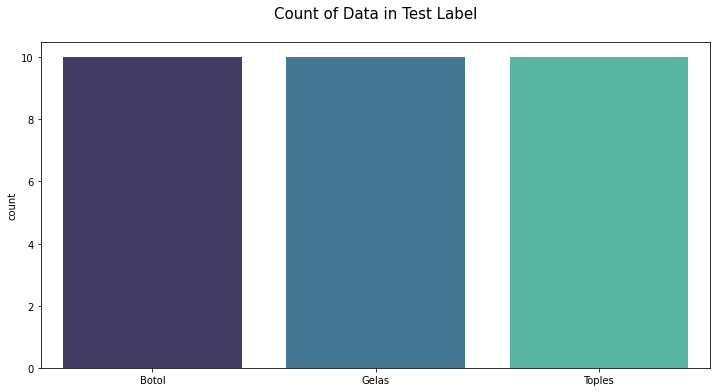

In [358]:
plt.figure(figsize = (12,6))
plt.title("Count of Data in Test Label\n", size = 15)

sns.countplot(x = test_label, palette='mako').set(xticklabels = classes);

In [359]:
print(f"Maximum value in train_images is: {train_image.max()}")
print(f"Minimum value in train_images is: {train_image.min()}\n")

print(f"Maximum value in test_images is: {test_image.max()}")
print(f"Minimum value in test_images is: {test_image.min()}")

Maximum value in train_images is: 255
Minimum value in train_images is: 0

Maximum value in test_images is: 255
Minimum value in test_images is: 0


In [360]:
train_image = train_image.astype('float64') / 255.0
test_image = test_image.astype('float64') / 255.0

In [361]:
print(f"Maximum value in train_images is: {train_image.max()}")
print(f"Minimum value in train_images is: {train_image.min()}\n")

print(f"Maximum value in test_images is: {test_image.max()}")
print(f"Minimum value in test_images is: {test_image.min()}")

Maximum value in train_images is: 1.0
Minimum value in train_images is: 0.0

Maximum value in test_images is: 1.0
Minimum value in test_images is: 0.0


In [362]:
print(train_label)
print(test_label)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


In [363]:
train_label = to_categorical(train_label, num_classes = 3)
test_label = to_categorical(test_label, num_classes = 3)

In [364]:
print(train_label)
print(test_label)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [365]:
input_shape = train_image.shape[1:]
num_classes = 10

In [366]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [367]:
model = Sequential()
#model.add(data_augmentation)
model.add(Conv2D(filters = 128, kernel_size = 2,activation = "relu", input_shape = input_shape))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(filters = 32, kernel_size = 2, activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = 2, activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(500, activation = "relu"))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation = "softmax"))

In [368]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 329, 329, 128)     1664      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 164, 164, 128)     0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 163, 163, 32)      16416     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 81, 81, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 81, 81, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 80, 80, 64)        8256      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 40, 40, 64)      

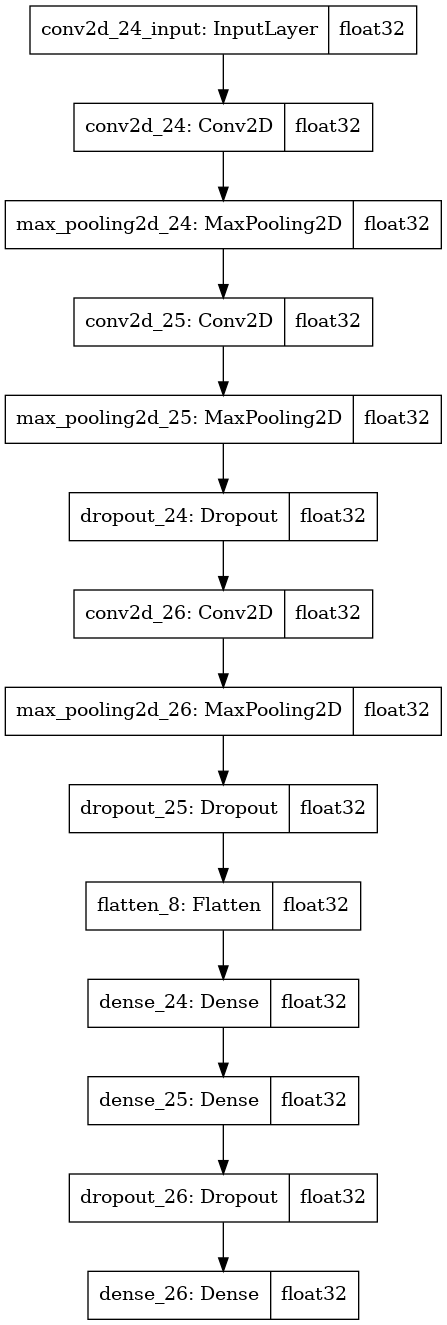

In [369]:
plot_model(model, show_dtype = True, show_layer_names = True)

In [370]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [371]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
earstop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
cekmodel = ModelCheckpoint(filepath='model.hdf5',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)
LR = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [372]:
result = model.fit(train_image, train_label,
                   validation_split = 0.2,
                   epochs = EPOCHS,
                   batch_size = BATCH_SIZE,
                   callbacks = [cekmodel])

Epoch 1/62
1/1 [==============================] - 4s 4s/step - loss: 1.1198 - accuracy: 0.2500 - val_loss: 11.1405 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to model.hdf5
Epoch 2/62
1/1 [==============================] - 3s 3s/step - loss: 4.5071 - accuracy: 0.4167 - val_loss: 5.9113 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/62
1/1 [==============================] - 3s 3s/step - loss: 5.0180 - accuracy: 0.4167 - val_loss: 1.4586 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/62
1/1 [==============================] - 3s 3s/step - loss: 1.6414 - accuracy: 0.4167 - val_loss: 1.1533 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/62
1/1 [==============================] - 3s 3s/step - loss: 1.0703 - accuracy: 0.4167 - val_loss: 1.6267 - val_accuracy: 0.0000e+00

Epoch 00005: val_accuracy did not improv

In [373]:
train_loss = result.history['loss']
train_acc = result.history['accuracy']
val_loss = result.history['val_loss']
val_acc = result.history['val_accuracy']

In [374]:
pd.DataFrame({"Training Loss" : train_loss,
             "Validation Loss": val_loss,
             "Train Accuracy" : train_acc,
             "Validation Accuracy" : val_acc}).style.bar(color='#ff781c') 

,Training Loss,Validation Loss,Train Accuracy,Validation Accuracy
0,1.119784,11.140519,0.250000,0.000000
1,4.507073,5.911304,0.416667,0.000000
2,5.017954,1.458579,0.416667,0.000000
3,1.641374,1.153289,0.416667,0.000000
4,1.070343,1.626702,0.416667,0.000000
5,1.202230,1.492409,0.416667,0.000000
6,1.029934,1.314250,0.458333,0.000000
7,1.019144,1.328064,0.416667,0.000000
8,0.969460,1.470118,0.458333,0.000000
9,0.818186,1.576857,0.750000,0.000000


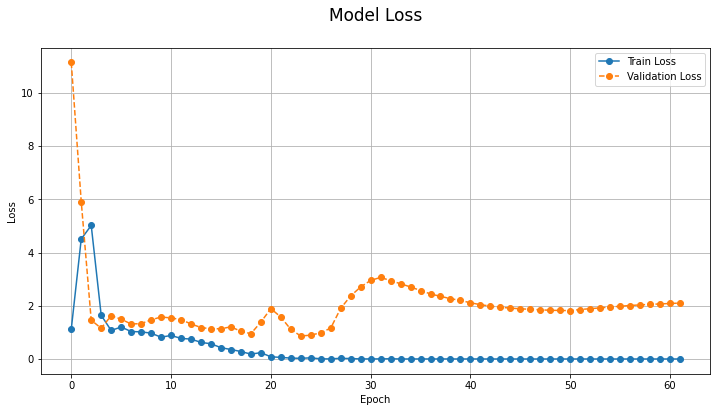

In [375]:
plt.figure(figsize = (12,6))

plt.title("Model Loss\n", size = 17)
plt.plot(train_loss, label = "Train Loss", marker = 'o')
plt.plot(val_loss, label='Validation Loss', linestyle='--', marker='o')
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend();

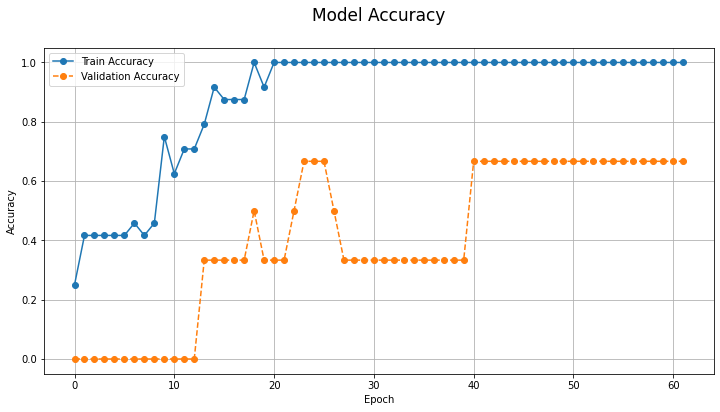

In [376]:
plt.figure(figsize = (12,6))

plt.title("Model Accuracy\n", size = 17)
plt.plot(train_acc, label = "Train Accuracy", marker = 'o')
plt.plot(val_acc, label='Validation Accuracy', linestyle='--', marker='o')
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend();

In [377]:
test_loss , test_acc = model.evaluate(test_image , test_label)

1/1 [==============================] - 1s 826ms/step - loss: 0.4202 - accuracy: 0.9333


In [378]:
print(f'Loss on test data is: {test_loss}')
print(f"Accuracy on test data is: {test_acc}")

Loss on test data is: 0.42021414637565613
Accuracy on test data is: 0.9333333373069763


In [379]:
img_15 = np.expand_dims(test_image[15], axis = 0)

pred_1 = model.predict(img_15)
pred_1

array([[8.1420768e-07, 9.9999917e-01, 3.6335134e-08]], dtype=float32)

In [380]:
pred_1.max()

0.99999917

In [381]:
pred_1.argmax()

1

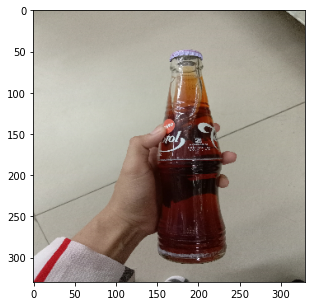

In [382]:
plt.figure(figsize = (10,5))

plt.imshow(test_image[15]);

In [383]:
all_prediction = model.predict(test_image)

In [384]:
predicted_labels = [np.argmax(pred) for pred in all_prediction]       

In [385]:
test_label = [np.argmax(i) for i in test_label]  

In [386]:
predicted_labels[:20]            # displaying first 20 predicted labels

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [387]:
test_label[:20]               # displaying first 20 actual labels

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [388]:
# creating confusion matrix

cm = confusion_matrix(labels = test_label, predictions = predicted_labels)

In [389]:
cm

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  8]], dtype=int32)>

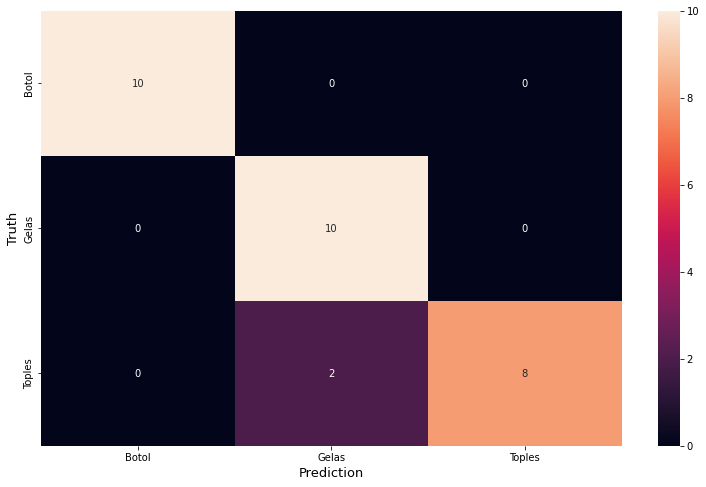

In [390]:
#  Visualizing using seaborn

plt.figure(figsize = (13,8))
sns.heatmap(cm, annot = True, fmt = 'd').set(xticklabels = classes, yticklabels = classes)
plt.xlabel("Prediction", size = 13)
plt.ylabel("Truth",  size = 13)
plt.show()

In [391]:
print(classification_report(test_label, predicted_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

